# DMT 2022 - Homework 1

# Instructions for the homework
  > Follow the instructions in the notebook carefully
  

## General instructions
  * Do NOT remove ANYTHING that is already in the notebook.
  * Before you start, show the line number for the code cells:
    * Go to Tools -> Settings -> Editor -> show line numbers
  * Having **EXACTLY TWO** students per group is **MANDATORY**
  * The software must be commented.
  * About this notebook:
    * Create a personal copy to be able to modify it: File > Save a copy in Drive
    * Rename the copied notebook `DMT2022-HW1.ipynb`

## Instructions for **code**:
  * DO NOT add code cells
  * DO NOT remove any code cells
  * Only edit the code cells containing the comment #YOUR CODE STARTS HERE#. Within those cells:
    * DO NOT remove ANYTHING that we have written (otherwise specified).
    * Add your code between line #YOUR CODE STARTS HERE# and line #YOUR CODE ENDS HERE#; **DO NOT REMOVE THESE COMMENTS**
    * **The last line in each code cell is #THIS IS LINE \<TOT>#, where \<TOT> is a line number. The notebook is constructed so that \<TOT> matches with the line number in which it is written, but it may of course move as you add your code. Make sure that, when you deliver it, that comment returns to line \<TOT>. DO NOT CHANGE THE \<TOT> VALUE. Of course, this means that you have a limited number of lines of code that you may NOT exceed under any circumstances. On the other hand, if your code is shorter than that, you have to reach that line number with empty lines.**

## Instructions for **text**:
* DO NOT add text cells
* DO NOT remove text cells
* DO NOT modify the text cells we have created.
* Only edit text cells starting with the comment ----------YOUR TEXT STARTS HERE----------. Within those cells:
  * Do NOT remove anything we have entered.
  * **Add your own text after the line ----------YOUR TEXT STARTS HERE----------; DO NOT REMOVE THIS TEXT**
  * For each cell, a specific delivery will be given. If you are given a maximum number of sentences to write, both the dot "." and the semicolon ";" will be considered sentence dividers.

#Homework

**Group composition:**
Write down the list of group members. The format should be Last Name, First Name, Serial Number. Group members should be sorted alphabetically by surname and placed on different lines.
Example:

Fazzone, Adriano, 987654

Siciliano, Federico, 999888

----------YOUR TEXT STARTS HERE----------

Boesso, Simone, 1800408

Pecile, Giulio, 1872568

The homework consists of two parts:
  1. Search-Engine Evaluation

  and

  2. Near-Duplicate-Detection


##Part 1

In this part of the homework, you have to index collections of documents to build search-engines using the PyTerrier library.

### Part 1.0
Import **ALL** the Python packages that you need for Part 1.

In [ ]:
#YOUR CODE STARTS HERE#
!pip install nptyping==1.4.4
!pip3 install python-terrier
import pyterrier as pt
if not pt.started():
  pt.init()
import pandas as pd
import os
#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

     |████████████████████████████████| 45 kB 1.8 MB/s 
     |████████████████████████████████| 97 kB 3.4 MB/s 
     |████████████████████████████████| 1.1 MB 36.1 MB/s 
     |████████████████████████████████| 69 kB 5.4 MB/s 
     |████████████████████████████████| 297 kB 41.1 MB/s 
     |████████████████████████████████| 46 kB 2.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 72 kB 1.4 MB/s 
     |████████████████████████████████| 294 kB 59.9 MB/s 
     |████████████████████████████████| 6.4 MB 45.7 MB/s 
     |████████████████████████████████| 1.2 MB 53.1 MB/s 
     |████████████████████████████████| 126 kB 46.6 MB/s 
     |████████████████████████████████| 596 kB 42.5 MB/s 
     |████████████████████████████████| 287 kB 50.5 MB/s 
     |████████████████████████████████| 59 kB 6.0 MB/s 
  Created wheel for python-terrier: filename=python_terrier-0.8.1-py3-none

PyTerrier 0.8.1 has loaded Terrier 5.6 (built by craigmacdonald on 2021-09-17 13:27)



### Part 1.1

You have to build a search engine for the `irds:nfcorpus/dev` dataset and **improve the search-engines performance** (the higher the better).
####1.1.1
Download the dataset from the PyTerrier dataset list.

In [ ]:
#YOUR CODE STARTS HERE#
# we import the dataset
dataset = pt.get_dataset('irds:nfcorpus/dev')





#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

####1.1.2
Choose several preprocessing configurations (at least 2, no more than 5). For each of them, construct an index on the `title` field. For the last of them, report the number of indexed documents and terms.

In [ ]:
#YOUR CODE STARTS HERE#
#we select the preprocessing configuratios
possible_preprocessing = ["", #no preprocessing
                          "Stopwords", #remove stopwords
                          "EnglishSnowballStemmer", #Probably the most famous stemmer in the world
                          "Stopwords, EnglishSnowballStemmer"] #Both previous ones
# for each of theme we construct an index
for configuration in possible_preprocessing:
  indexer = pt.IterDictIndexer("./Inverted_Index {}".format(configuration),meta=['docno', 'title'],overwrite=True)
  indexer.setProperty("termpipelines", configuration)
  index_ref = indexer.index(dataset.get_corpus_iter(), fields=['title'], meta=('docno','title'))
  exec("index_{}  = indexer.index(dataset.get_corpus_iter(), fields=['title'], meta=('docno','title'))".format(configuration.replace(", ","")))

#for the last index we report the number of indexed documents and terms
index_factory = pt.IndexFactory.of("./Inverted_Index Stopwords, EnglishSnowballStemmer")
print(index_factory.getCollectionStatistics().toString())


#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

nfcorpus/dev documents:   0%|          | 0/5371 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: specifying meta and meta_lengths in IterDictIndexer.index() is deprecated, use constructor instead
  # This is added back by InteractiveShellApp.init_path()
[INFO] If you have a local copy of https://www.cl.uni-heidelberg.de/statnlpgroup/nfcorpus/nfcorpus.tar.gz, you can symlink it here to avoid downloading it again: /root/.ir_datasets/downloads/49c061fbadc52ba4d35d0e42e2d742fd
[INFO] [starting] https://www.cl.uni-heidelberg.de/statnlpgroup/nfcorpus/nfcorpus.tar.gz

https://www.cl.uni-heidelberg.de/statnlpgroup/nfcorpus/nfcorpus.tar.gz: 0.0%| 0.00/31.0M [00:00<?, ?B/s]
https://www.cl.uni-heidelberg.de/statnlpgroup/nfcorpus/nfcorpus.tar.gz: 11.9%| 3.69M/31.0M [00:00<00:00, 36.1MB/s]
https://www.cl.uni-heidelberg.de/statnlpgroup/nfcorpus/nfcorpus.tar.gz: 31.3%| 9.72M/31.0M [00:00<00:00, 47.9MB/s]
https://www.cl.uni-heidelberg.de/statnlpgroup/nfcorpus/nfcorpus.tar.gz: 50.8%| 15.8M/31.0M [00:00<00:00, 49.9

nfcorpus/dev documents:   0%|          | 0/5371 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: specifying meta and meta_lengths in IterDictIndexer.index() is deprecated, use constructor instead
  """Entry point for launching an IPython kernel.


nfcorpus/dev documents:   0%|          | 0/5371 [00:00<?, ?it/s]

nfcorpus/dev documents:   0%|          | 0/5371 [00:00<?, ?it/s]

nfcorpus/dev documents:   0%|          | 0/5371 [00:00<?, ?it/s]

nfcorpus/dev documents:   0%|          | 0/5371 [00:00<?, ?it/s]

nfcorpus/dev documents:   0%|          | 0/5371 [00:00<?, ?it/s]

nfcorpus/dev documents:   0%|          | 0/5371 [00:00<?, ?it/s]

Number of documents: 5371
Number of terms: 5072
Number of postings: 57283
Number of fields: 1
Number of tokens: 58358
Field names: [title]
Positions:   false



####1.1.3
Choose several weighting models (at least 3, no more than 5). For each of them, for each of the indices created in last step, build a retrieval model.

In [ ]:
#YOUR CODE STARTS HERE#
# we select the weighting models
possible_wmodels = ["CoordinateMatch", #Term presence
                    "Tf","TF_IDF"] #Term frequency
# for each of them and for each of the created index we build a retrieval model
doc ={}
for wmodel in possible_wmodels:
  doc[(wmodel,"retrieval_empty")] = pt.BatchRetrieve(index_, wmodel = wmodel)
  doc[(wmodel,"retrieval_onlyStop")] = pt.BatchRetrieve(index_Stopwords, wmodel = wmodel)
  doc[(wmodel,"retrieval_StopAndStem")] = pt.BatchRetrieve(index_StopwordsEnglishSnowballStemmer, wmodel = wmodel)
  doc[(wmodel,"retrieval_onlyStem")] = pt.BatchRetrieve(index_EnglishSnowballStemmer, wmodel = wmodel)







#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

####1.1.4
Choose several evaluation metrics (at least 2, no more than 5) and put them in a list. Add the following metrics to the list: Precision at 5, Normalized Discounted Cumulative Gain at 10, Mean Reciprocal Rank. Obviously, the metrics you choose cannot be completely identical to these 3 we specified.

In [ ]:
#YOUR CODE STARTS HERE#
from pyterrier.measures import *
#we select the evaluation metrics
eval_metrics=["P_3", "recall_10",
              "map",
              "ndcg_cut_10", "P_5", "recip_rank"]












#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

####1.1.5
For each index built in step 1.1.2, run an experiment to obtain the values associated to each evaluations metric specified in 1.1.4 for each of the weighting models chosen in 1.1.3.

In [ ]:
#YOUR CODE STARTS HERE#
# we get the queries
topics = dataset.get_topics(variant="title")
qrels = dataset.get_qrels()
# for each weighting model we run an experiment
exps=[]
for preproc in ["retrieval_empty","retrieval_onlyStop","retrieval_StopAndStem","retrieval_onlyStem"]:
  res_exp_dataset = pt.Experiment(
      [doc[(a,preproc)] for a in possible_wmodels],
      topics,
      qrels,
      eval_metrics=eval_metrics,
      #round={"P_1":2, "P_3":2, "P_5":2, "P_10":2, "ndcg_cut_3":2, "ndcg_cut_5":2, "ndcg_cut_10":2, "num_q":0},
      names=["CoordinateMatch{}".format(preproc), "TF{}".format(preproc), "TF_IDF{}".format(preproc)]
      ,highlight="bold"
  )
  exps.append(res_exp_dataset.data.set_index("name"))











#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

/usr/local/lib/python3.7/dist-packages/pyterrier/datasets.py:435: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.columns.difference(['qid','query']), 1, inplace=True)


####1.1.6
For the last index constructed (i.e. corresponding to the last preprocessing chosen), print out the PyTerrier table with the weighting models chosen by you on the rows and the evaluation metrics chosen by you + those specified by us on the columns. Highlight the best results in the result table.

In [ ]:
#YOUR CODE STARTS HERE#
#for the last index we print the PyTerrier table
res_exp_dataset





#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

,name,P_3,recall_10,map,ndcg_cut_10,P_5,recip_rank
0,CoordinateMatchretrieval_onlyStem,0.139487,0.048007,0.040058,0.121489,0.124923,0.267474
1,TFretrieval_onlyStem,0.132308,0.040212,0.031785,0.104946,0.111385,0.245980
2,TF_IDFretrieval_onlyStem,0.200000,0.064826,0.053039,0.172737,0.177231,0.369532


####1.1.7
Select the Top-5 configurations (preprocessing, weighting model) according to the Mean Recirpocal Rank (MRR), taking into account all the results obtained in section 1.1.5.

In [ ]:
#YOUR CODE STARTS HERE#
#we select the Top-5 configurations
col = pd.Series()
for el in exps:
  rec_rank = el["recip_rank"]
  col = pd.concat([col,rec_rank])
col= col.sort_values(ascending=False)

res = col[0:5]
res


















#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


TF_IDFretrieval_StopAndStem             0.390368
TF_IDFretrieval_onlyStem                0.369532
TF_IDFretrieval_onlyStop                0.352702
TF_IDFretrieval_empty                   0.336203
CoordinateMatchretrieval_StopAndStem    0.299307
dtype: float64

For each of these 5 configurations, print out the pre-processing and weighting model applied.

In [ ]:
#YOUR CODE STARTS HERE#
# for each of them we print the preprocessing and weighting model
for pos,index in enumerate(res.index):
  l = index.split("_")
  preprocessing = l[-1]
  weightmodel = " ".join(l[:-1])
  print("the  configuration at  position {} is the following:".format(str(pos+1)))
  print("the pre-processing is {}".format(preprocessing))
  print("the weighting model is {}\n".format(weightmodel))









#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

the  configuration at  position 1 is the following:
the pre-processing is StopAndStem
the weighting model is TF IDFretrieval

the  configuration at  position 2 is the following:
the pre-processing is onlyStem
the weighting model is TF IDFretrieval

the  configuration at  position 3 is the following:
the pre-processing is onlyStop
the weighting model is TF IDFretrieval

the  configuration at  position 4 is the following:
the pre-processing is empty
the weighting model is TF IDFretrieval

the  configuration at  position 5 is the following:
the pre-processing is StopAndStem
the weighting model is CoordinateMatchretrieval



For these 5 configurations, provide the following plots (re-run the evaluations just for this configurations, to get the required evaluation metrics):

* P@k plot
    * the x axis represents the considered values for k: you must consider k 𝜖 {1, 3, 5, 10}
    * the y axis represents the average P@k over all provided queries
    * each curve represents one of the 5 search engine configurations

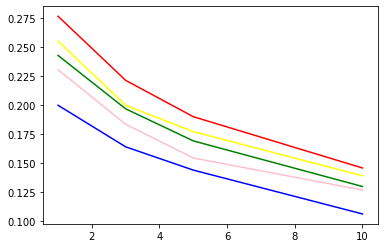

In [ ]:
#YOUR CODE STARTS HERE#
import matplotlib.pyplot as plt
# we select the found configurations
config1 = doc[("TF_IDF","retrieval_StopAndStem")]
config2 = doc[("TF_IDF","retrieval_onlyStem")]
config3 = doc[("TF_IDF","retrieval_onlyStop")]
config4 = doc[("TF_IDF","retrieval_empty")]
config5 = doc[("CoordinateMatch","retrieval_StopAndStem")]
# we run the experiment 
res_exp_dataset = pt.Experiment(
      [config1,config2,config3,config4,config5],
      topics,
      qrels,
      eval_metrics=["P_1","P_3","P_5","P_10"],
      #round={"P_1":2, "P_3":2, "P_5":2, "P_10":2, "ndcg_cut_3":2, "ndcg_cut_5":2, "ndcg_cut_10":2, "num_q":0},
      names=["TF_IDFretrieval_StopAndStem","TF_IDFretrieval_onlyStem","TF_IDFretrieval_onlyStop","TF_IDFretrieval_empty","CoordinateMatchretrieval_StopAndStem"]
)
del res_exp_dataset["name"]
# we plot the curves
plt.plot([1,3,5,10],list(res_exp_dataset.loc[0].values),color="red")
plt.plot([1,3,5,10],list(res_exp_dataset.loc[1].values),color="yellow")
plt.plot([1,3,5,10],list(res_exp_dataset.loc[2].values),color="green")
plt.plot([1,3,5,10],list(res_exp_dataset.loc[3].values),color="pink")
plt.plot([1,3,5,10],list(res_exp_dataset.loc[4].values),color="blue")
plt.show()



#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

* nDCG@k plot
    * the x axis represents the considered values for k: you must consider k 𝜖 {1, 3, 5, 10}
    * the y axis represents the average nDCG@k over all provided queries
    * each curve represents one of the 5 search engine configurations

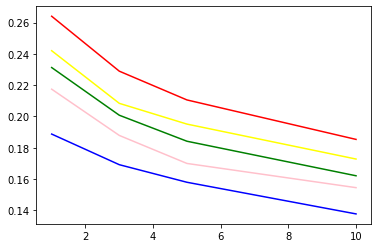

In [ ]:
#YOUR CODE STARTS HERE#
# we select the found configurations
config1 = doc[("TF_IDF","retrieval_StopAndStem")]
config2 = doc[("TF_IDF","retrieval_onlyStem")]
config3 = doc[("TF_IDF","retrieval_onlyStop")]
config4 = doc[("TF_IDF","retrieval_empty")]
config5 = doc[("CoordinateMatch","retrieval_StopAndStem")]
# we run the experiment 
res_exp_dataset = pt.Experiment(
      [config1,config2,config3,config4,config5],
      topics,
      qrels,
      eval_metrics=["ndcg_cut_1","ndcg_cut_3","ndcg_cut_5","ndcg_cut_10"],
      #round={"P_1":2, "P_3":2, "P_5":2, "P_10":2, "ndcg_cut_3":2, "ndcg_cut_5":2, "ndcg_cut_10":2, "num_q":0},
      names=["TF_IDFretrieval_StopAndStem","TF_IDFretrieval_onlyStem","TF_IDFretrieval_onlyStop","TF_IDFretrieval_empty","CoordinateMatchretrieval_StopAndStem"]
)
del res_exp_dataset["name"]
# we plot the curves
plt.plot([1,3,5,10],list(res_exp_dataset.loc[0].values),color="red")
plt.plot([1,3,5,10],list(res_exp_dataset.loc[1].values),color="yellow")
plt.plot([1,3,5,10],list(res_exp_dataset.loc[2].values),color="green")
plt.plot([1,3,5,10],list(res_exp_dataset.loc[3].values),color="pink")
plt.plot([1,3,5,10],list(res_exp_dataset.loc[4].values),color="blue")
plt.show()




#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

####1.1.8
According only to the nDCG@k plot, which is the best search engine configuration? Explain your answer in **at most three sentences**.

The best configuration is the one with the highest nDCG score (in red), where stopwords are removed and tokens are stemmed. The weighting model here is TF-IDF. This holds for every k considered.

### Part 1.2

You will be given several scenarios and different requirements for each one. By respecting the requirements, you will have to choose the proper **configuration**, represented in terms of:
1. A suitable preprocessing (if any)
2. A suitable weighting model (if any)
3. A suitable evaluation metric (if any)

You must then:
1. Provide an explanation of your choice in **at most three sentences**.
2. Implement one search engine with this configuration and, if necessary, obtain the evaluation metrics you specified.

N.B. There is not necessarily only one correct answer.

#### 1.2.1
**Question 1:** The company A-DMT needs a search engine for the `irds:cranfield` dataset. In particular, it is interested in obtaining **exact matches** between the terms in the `author` field and the query terms; e.g. it does not want "apple" to be matched with "apples".

What is the configuration (as defined in part 1.2) that would best meet the needs of the A-DMT company? **Use at most 3 sentences.**

The preprocessing configuration would be a simple tokenization of the corpus as some words that could be confused with stopwords may have relevance; lemmization or stemming would also make exact matches impossible.
The weighting model could be the coordinate match because we are interest in exact matches since we are looking for names.
The evaluation metric would be precision because for the nature of exact queries, the result is either relevant or not and order is not as important.

Implement one search engine with this configuration and, if necessary, obtain the evaluation metrics you specified.

In [ ]:
#YOUR CODE STARTS HERE#
# we import the dataset
dataset = pt.get_dataset('irds:cranfield');
#we set the configuration
configuration = "" 
indexer = pt.IterDictIndexer("./Inverted_Index {}".format(configuration),meta=['docno', 'author'],overwrite=True);
indexer.setProperty("termpipelines", configuration);
index_ref = indexer.index(dataset.get_corpus_iter(), fields=['author'], meta=('docno','author'));
index_  = indexer.index(dataset.get_corpus_iter(), fields=['author'], meta=('docno','author'));
#we set the weighting model
wmodel = "CoordinateMatch"
batch_retrieve = pt.BatchRetrieve(index_, wmodel = wmodel);
# we run the experiment
res_exp_dataset = pt.Experiment(
       [batch_retrieve],
       topics = dataset.get_topics(),
       qrels = dataset.get_qrels(),
       eval_metrics=["P_1", "P_3", "P_5"],
       names=["Coordinate Match - Simple"]
);
res_exp_dataset







#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

cranfield documents:   0%|          | 0/1400 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: specifying meta and meta_lengths in IterDictIndexer.index() is deprecated, use constructor instead
  
[INFO] [starting] http://ir.dcs.gla.ac.uk/resources/test_collections/cran/cran.tar.gz

http://ir.dcs.gla.ac.uk/resources/test_collections/cran/cran.tar.gz: 0.0%| 0.00/507k [00:00<?, ?B/s]
[INFO] [finished] http://ir.dcs.gla.ac.uk/resources/test_collections/cran/cran.tar.gz: [00:00] [507kB] [5.72MB/s]

http://ir.dcs.gla.ac.uk/resources/test_collections/cran/cran.tar.gz: [00:00] [507kB] [5.00MB/s]
                                                                                               

14:14:14.316 [ForkJoinPool-9-worker-3] WARN org.terrier.structures.indexing.Indexer - Adding an empty document to the index (281) - further warnings are suppressed
14:14:14.672 [ForkJoinPool-9-worker-3] WARN org.terrier.structures.indexing.Indexer - Indexed 53 empty documents


cranfield documents:   0%|          | 0/1400 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: specifying meta and meta_lengths in IterDictIndexer.index() is deprecated, use constructor instead
  if __name__ == '__main__':


14:14:15.678 [ForkJoinPool-10-worker-3] WARN org.terrier.structures.indexing.Indexer - Adding an empty document to the index (281) - further warnings are suppressed
14:14:16.010 [ForkJoinPool-10-worker-3] WARN org.terrier.structures.indexing.Indexer - Indexed 53 empty documents


,name,P_1,P_3,P_5
0,Coordinate Match - Simple,0.006579,0.004386,0.005263


#### 1.2.2
**Question 2:** The B-DMT company needs a search engine for the `irds:clinicaltrials/2017/trec-pm-2017` dataset for its app. The search engine they need will have to return to users the list of the top-6 results sorted in descending order of relevance to the given query. The company wants to evaluate the performance on query topic `disease` of a search engine built on the `summary` field.

What is the configuration (as defined in part 1.2) that would best meet the needs of the B-DMT company? **Use at most 3 sentences.**

A preprocessing configuration could be a simple tokenization since we don't want to change the words

A weighting model could be TF-IDF because frequent terms are less characterizing of a query-document match (e.g. "cancer" is very frequent but not very meaningful).

An evaluation metric could be nDCG@6 because order of relevance matters


Implement one search engine with this configuration and, if necessary, obtain the evaluation metrics you specified.

In [13]:
#YOUR CODE STARTS HERE#
# we import the dataset
dataset = pt.get_dataset('irds:clinicaltrials/2017/trec-pm-2017')
# we set the configuration
configuration = "" 
indexer = pt.IterDictIndexer("./Inverted_Index {}".format(configuration),meta=['docno', 'summary'],overwrite=True);
indexer.setProperty("termpipelines", configuration);
index_ref = indexer.index(dataset.get_corpus_iter(), fields=['summary'], meta=('docno','summary'));
index_  = indexer.index(dataset.get_corpus_iter(), fields=['summary'], meta=('docno','summary'));
# we set the weigthing model
wmodel = "TF_IDF"
batch_retrieve = pt.BatchRetrieve(index_, wmodel = wmodel);
# we run the experiment
res_exp_dataset = pt.Experiment(
       [batch_retrieve],
       topics = dataset.get_topics(variant='disease'),
       qrels = dataset.get_qrels(),
       eval_metrics=["ndcg_cut_6"],
       names=["TF_IDF - Simple"]
);
res_exp_dataset







#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

Output streaming troncato alle ultime 5000 righe.
https://bionlp.nlm.nih.gov/trec2017precisionmedicine/clinicaltrials_xml.tar.gz: 9.7%| 70.3M/725M [01:37<15:03, 724kB/s]
https://bionlp.nlm.nih.gov/trec2017precisionmedicine/clinicaltrials_xml.tar.gz: 9.7%| 70.4M/725M [01:37<15:03, 724kB/s]
https://bionlp.nlm.nih.gov/trec2017precisionmedicine/clinicaltrials_xml.tar.gz: 9.7%| 70.5M/725M [01:37<15:03, 724kB/s]
https://bionlp.nlm.nih.gov/trec2017precisionmedicine/clinicaltrials_xml.tar.gz: 9.7%| 70.7M/725M [01:37<15:02, 724kB/s]
https://bionlp.nlm.nih.gov/trec2017precisionmedicine/clinicaltrials_xml.tar.gz: 9.8%| 70.8M/725M [01:37<15:02, 724kB/s]
https://bionlp.nlm.nih.gov/trec2017precisionmedicine/clinicaltrials_xml.tar.gz: 9.8%| 70.9M/725M [01:37<15:02, 724kB/s]
https://bionlp.nlm.nih.gov/trec2017precisionmedicine/clinicaltrials_xml.tar.gz: 9.8%| 71.0M/725M [01:38<15:02, 725kB/s]
https://bionlp.nlm.nih.gov/trec2017precisionmedicine/clinicaltrials_xml.tar.gz: 9.8%| 71.2M/725M [01:38<15:02,

clinicaltrials/2017/trec-pm-2017 documents:   0%|          | 0/241006 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: specifying meta and meta_lengths in IterDictIndexer.index() is deprecated, use constructor instead
  


14:36:42.979 [ForkJoinPool-11-worker-3] WARN org.terrier.structures.indexing.Indexer - Adding an empty document to the index (NCT00589069) - further warnings are suppressed
14:38:21.635 [ForkJoinPool-11-worker-3] WARN org.terrier.structures.indexing.Indexer - Indexed 682 empty documents


clinicaltrials/2017/trec-pm-2017 documents:   0%|          | 0/241006 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: specifying meta and meta_lengths in IterDictIndexer.index() is deprecated, use constructor instead
  if __name__ == '__main__':


14:38:38.121 [ForkJoinPool-12-worker-3] WARN org.terrier.structures.indexing.Indexer - Adding an empty document to the index (NCT00589069) - further warnings are suppressed
14:40:10.490 [ForkJoinPool-12-worker-3] WARN org.terrier.structures.indexing.Indexer - Indexed 682 empty documents


[INFO] [starting] https://trec.nist.gov/data/precmed/topics2017.xml
[INFO] [finished] https://trec.nist.gov/data/precmed/topics2017.xml: [00:00] [5.66kB] [2.54MB/s]
/usr/local/lib/python3.7/dist-packages/pyterrier/datasets.py:435: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.columns.difference(['qid','query']), 1, inplace=True)
[INFO] [starting] https://trec.nist.gov/data/precmed/qrels-final-trials.txt
[INFO] [finished] https://trec.nist.gov/data/precmed/qrels-final-trials.txt: [00:00] [244kB] [537kB/s]


,name,ndcg_cut_6
0,TF_IDF - Simple,0.03016


##Part 2

In this part of the homework, you have to find, in an approximated way, all near-duplicate documents inside a collection of documents.

These constraints **must** be satisfied while carrying out this part of the homework:

  * We will consider Near-duplicates all those pair of documents that have a Jaccard similarity greater than or equal to 0.95
  * Each set of shingles, that represents an original document, must be sketched in a Min-Hashing sketch with a length of at most 210
  * The probability to have as a near-duplicate candidate a pair of documents with Jaccard=0.95 must be > 0.97
  * The generation process of near-duplicate pairs you implement must generate the smallest amount of both **False-Negatives** and **False-Positives**
  * The running time of all the LSH process must be less than 10 minutes.

### Part 2.0
Import Python packages that you may need for Part 2.

In [52]:
#YOUR CODE STARTS HERE#
import csv, time
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import itertools as it
#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

#### NDD functions
A range of functions to perform the Near-Duplicates pipeline is provided by us. You must use them, but **you may not modify or overwrite** them under any circumstances. If you have any doubts about how they work, have a look at them to get an idea of what they do.

##### Shingling

> The `cleaner` function will remove from a string all the characters that are not in a predefined set of characters of interest. Multiple spaces will be removed automatically. The function will also remove spaces at the start and end of the sentence, and change all the letters to lowercase.

In [15]:
set__characters_of_interest = set(
    [' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
     'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])
def cleaner(text, set__characters_of_interest):
    new_text = ""
    #
    previous_copied_character = "a"
    for c_character in text:
        #
        c_character = c_character.lower()
        #
        if c_character not in set__characters_of_interest:
            c_character = " "
        #
        if c_character == " " and c_character == previous_copied_character:
            continue
        #
        new_text += c_character
        #
        previous_copied_character = c_character
        #
    #
    new_text = new_text.strip()
    #
    return new_text

> The `get_shingle_id` function will transform a shingle (a tuple of strings) into its shingle id. The `map__shingle__shingle_id` dictionary will handle the mapping.

In [16]:
def get_shingle_id(shingle):
    global max_shingle_id
    global map__shingle__shingle_id
    #
    shingle_id = map__shingle__shingle_id.get(shingle, -1)
    #
    if shingle_id >= 0:
        return shingle_id
    #
    max_shingle_id += 1
    shingle_id = max_shingle_id
    map__shingle__shingle_id[shingle] = max_shingle_id
    #
    return shingle_id

> The `shingler` function takes as input a string and (optionally) a shingle width. It splits the string into words, then iterates in groups of the given length, transforming each into its own shingle_id, and finally outputs the set of shingles that constitutes the sentence.

In [17]:
def shingler(text, width=2):
    #
    set__shingle_id = set()
    #
    tokenized_text = text.split(" ")
    #
    max_index_plus_1 = 1 if len(tokenized_text) <= width else len(tokenized_text) - width +1
    for index in range(max_index_plus_1):
        #
        c_shingle = tuple(tokenized_text[index:index + width])
        #
        shingle_id = get_shingle_id(c_shingle)
        #
        # if shingle_id in set__shingle_id:
        #    print(shingle_id, c_shingle)
        #
        res = set__shingle_id.add(shingle_id)
        #
    return set__shingle_id

> This function will load each sentence inside the input file. The rows of the input file must have two attributes: document_id and document_text. For each record, the text will be processed by the `cleaner` function, turned into shingles by the `shingler` function, and the result will be written in the output file.

In [18]:
def create_sets_of_shingle_ids(input_file_name, output_file_name,
                               input_file_delimiter='\t', input_file_quotechar='"',
                               set__characters_of_interest=[" "], shingle_width=3,
                               doc_id_column_idx=0, field_column_idx=1):
    #
    output_file = open(output_file_name, 'w', encoding="utf-8")
    output_file_csv_writer = csv.writer(output_file, delimiter='\t', quotechar='"', quoting=csv.QUOTE_NONE)
    header = ['set_id', 'set_of_integers']
    output_file_csv_writer.writerow(header)
    #
    input_file = open(input_file_name, 'r', encoding="utf-8")
    input_file_csv_reader = csv.reader(input_file, delimiter=input_file_delimiter, quotechar=input_file_quotechar)
    next(input_file_csv_reader)
    for record in input_file_csv_reader:
        #
        doc_id = int(record[doc_id_column_idx])
        document = record[field_column_idx]
        #
        cleaned_document = cleaner(document, set__characters_of_interest)
        #
        set__shingle_id = shingler(cleaned_document, width=shingle_width)
        #
        output_file_csv_writer.writerow([doc_id, set__shingle_id])
        #
        #
        if doc_id % 1000 == 0:
            print("Last processed doc_id:", doc_id)
        #
    input_file.close()
    output_file.close()
    print("Last processed doc_id:", doc_id)
    print()
    print("max_shingle_id=", max_shingle_id)
    print()
    print()
    return max_shingle_id

##### MinWise Hashing

> This simple function will (smartly) check if a number is prime.

In [19]:
def is_prime(number):
    #
    if number == 2:
        return True
    if (number % 2) == 0:
        return False
    for j in range(3, int(number ** 0.5 + 1), 2):
        if (number % j) == 0:
            return False
    #
    return True

> The `create_hash_functions` function will take as input the number of hash function desired and the upper bound on the number of distinct elements. It will generate the three values `(a, b, p)` that defines an hash function `number_of_hash_functions` times and return all this information into a dictionary. The optional seed argument will be used to set the random seed, so that the hash function obtained can be controlled.

In [20]:
def create_hash_functions(number_of_hash_functions, upper_bound_on_number_of_distinct_elements, seed=42):
    random.seed(seed)
    #
    map__hash_function_id__a_b_p = {}
    #
    set_of_all_hash_functions = set()
    while len(set_of_all_hash_functions) < number_of_hash_functions:
        a = random.randint(1, upper_bound_on_number_of_distinct_elements - 1)
        b = random.randint(0, upper_bound_on_number_of_distinct_elements - 1)
        p = random.randint(upper_bound_on_number_of_distinct_elements, 10 * upper_bound_on_number_of_distinct_elements)
        while is_prime(p) == False:
            p = random.randint(upper_bound_on_number_of_distinct_elements,
                               10 * upper_bound_on_number_of_distinct_elements)
        #
        c_hash_function = (a, b, p)
        set_of_all_hash_functions.add(c_hash_function)
    #
    for c_hash_function_id, c_hash_function in enumerate(set_of_all_hash_functions):
        map__hash_function_id__a_b_p[c_hash_function_id] = c_hash_function
    #
    return map__hash_function_id__a_b_p

> The `create_c_set_MinWiseHashing_sketch` function will receive as input a set of shingles, a list of hash functions parameters and the total number of hash functions to use. For each hash function, it applies it to each shingle and keeps the minimum value. It gives as output the MinWiseHashing sketch as a list.

In [21]:
def create_c_set_MinWiseHashing_sketch(c_set,
                                       map_as_list__index__a_b_p,
                                       total_number_of_hash_functions):
    plus_inf = float("+inf")
    c_set_MinWiseHashing_sketch = [plus_inf] * total_number_of_hash_functions
    #
    for c_element_id in c_set:
        index = -1
        for a, b, p in map_as_list__index__a_b_p:
            index += 1
            #
            c_hash_value = (a * c_element_id + b) % p
            #
            if c_hash_value < c_set_MinWiseHashing_sketch[index]:
                c_set_MinWiseHashing_sketch[index] = c_hash_value
            #
        #   
    #
    return c_set_MinWiseHashing_sketch

> The `create_MinWiseHashing_sketches` function first generates the list of hash functions. Then it iterates through the input file containing the set of shingles for each document, computing the MinWiseHashing sketch for each set of shingles and storing this information into a dictionary. This variable is then saved into an output file.

In [22]:
def create_MinWiseHashing_sketches(input_file_name, upper_bound_on_number_of_distinct_elements,
                                   number_of_hash_functions_that_is_also_the_sketch_lenght_and_also_the_number_of_simulated_permutations,
                                   output_file_name):
    #
    map__hash_function_id__a_b_p = create_hash_functions(
        number_of_hash_functions_that_is_also_the_sketch_lenght_and_also_the_number_of_simulated_permutations,
        upper_bound_on_number_of_distinct_elements)
    #
    map__set_id__MinWiseHashing_sketch = {}
    #
    total_number_of_hash_functions = len(map__hash_function_id__a_b_p)
    # sorted_list_all_hash_function_id = sorted(map__hash_function_id__a_b_p.keys())
    map_as_list__index__a_b_p = tuple([(a, b, p) for a, b, p in map__hash_function_id__a_b_p.values()])
    #
    input_file = open(input_file_name, 'r', encoding="utf-8")
    input_file_csv_reader = csv.reader(input_file, delimiter='\t', quotechar='"', quoting=csv.QUOTE_NONE)
    header = next(input_file_csv_reader)
    num_record_so_far = 0
    for record in input_file_csv_reader:
      num_record_so_far += 1
      if num_record_so_far % 100 == 0:
          print(num_record_so_far)
      c_set_id = int(record[0])
      c_set = eval(record[1])

      c_set_MinWiseHashing_sketch = create_c_set_MinWiseHashing_sketch(c_set,map_as_list__index__a_b_p,total_number_of_hash_functions)
      
      #print(len(c_set_MinWiseHashing_sketch))
      map__set_id__MinWiseHashing_sketch[c_set_id] = c_set_MinWiseHashing_sketch
    input_file.close()
    #
    output_file = open(output_file_name, 'w', encoding="utf-8")
    output_file_csv_writer = csv.writer(output_file, delimiter='\t', quotechar='"', quoting=csv.QUOTE_NONE)
    header = ['set_id', 'MinWiseHashing_sketch']
    output_file_csv_writer.writerow(header)
    sorted_list_all_set_id = sorted(map__set_id__MinWiseHashing_sketch.keys())
    for c_set_id in sorted_list_all_set_id:
        output_file_csv_writer.writerow([c_set_id, str(map__set_id__MinWiseHashing_sketch[c_set_id])])
    output_file.close()
    #
    return

##### Locality-Sensitive Hashing

> This function will simply load the MinWiseHashing sketches from the given input file.

In [23]:
def load_map__set_id__MinWiseHashing_sketch_from_file(input_file_name):
    map__set_id__MinWiseHashing_sketch = {}
    #
    input_file = open(input_file_name, 'r', encoding="utf-8")
    input_file_csv_reader = csv.reader(input_file, delimiter='\t', quotechar='"', quoting=csv.QUOTE_NONE)
    header = next(input_file_csv_reader)
    for record in input_file_csv_reader:
        c_set_id = int(record[0])
        c_MinhiseHashing_sketch = tuple(eval(record[1]))
        #
        map__set_id__MinWiseHashing_sketch[c_set_id] = c_MinhiseHashing_sketch
        #
    input_file.close()
    #
    return map__set_id__MinWiseHashing_sketch

> The function computes the sets of unordered couples of document identifiers for which there is at least one band in common between the MinWiseHashing sketches. It takes in input the number or rows and the number of bands and the MinWiseHashing sketches. The number of rows (r) multiplied by the number of bands (b) must be equal to the size of the sketches (n): r*b = n.

In [24]:
def get_set_of_CANDIDATES_to_be_near_duplicates(r, b, map__set_id__MinWiseHashing_sketch):
    #
    set_of_CANDIDATES_to_be_near_duplicates = set()
    #
    for c_band_progressive_id in range(b):
        #
        print("c_band_progressive_id", c_band_progressive_id)
        #
        c_band_starting_index = c_band_progressive_id * r
        c_band_ending_index = (c_band_progressive_id + 1) * r
        #
        map__band__set_set_id = {}
        #
        for c_set_id in map__set_id__MinWiseHashing_sketch:
            #
            if r * b != len(map__set_id__MinWiseHashing_sketch[c_set_id]):
                n = len(map__set_id__MinWiseHashing_sketch[c_set_id])
                message = "ERROR!!! n != r*b " + str(n) + "!=" + str(r * b) + "; " + str(n) + "!=" + str(r) + "*" + str(
                    b)
                raise ValueError(message)
            #
            c_band_for_c_set = tuple(
                map__set_id__MinWiseHashing_sketch[c_set_id][c_band_starting_index:c_band_ending_index])
            #
            if c_band_for_c_set not in map__band__set_set_id:
                map__band__set_set_id[c_band_for_c_set] = set()
            map__band__set_set_id[c_band_for_c_set].add(c_set_id)
            #

        for c_set_set_id in map__band__set_set_id.values():
            #
            if len(c_set_set_id) > 1:
                #
                for set_id_a, set_id_A in it.combinations(c_set_set_id, 2):
                    if set_id_a < set_id_A:
                        set_of_CANDIDATES_to_be_near_duplicates.add((set_id_a, set_id_A))
                    else:
                        set_of_CANDIDATES_to_be_near_duplicates.add((set_id_A, set_id_a))
        #
    #
    return set_of_CANDIDATES_to_be_near_duplicates

> Given two MinWiseHashing sketches, this function will iterate through each of them, counting how many items are equal. Then, it will output this count divided by the length of the sketches.

In [25]:
def compute_approximate_jaccard(set_a_MinWiseHashing_sketch, set_b_MinWiseHashing_sketch):
    appx_jaccard = 0.
    #
    for index in range(len(set_a_MinWiseHashing_sketch)):
        #
        if set_a_MinWiseHashing_sketch[index] == set_b_MinWiseHashing_sketch[index]:
            appx_jaccard += 1
        #
    appx_jaccard /= len(set_a_MinWiseHashing_sketch)
    #
    return appx_jaccard

> Given a Jaccard Threshold, this function will iterate through the list of near duplicates CANDIDATES, computing for each of them the approximate jaccard. If this value overcomes the threshold, the candidate pair is added to a dictionary to be returned.

In [26]:
def compute_approximate_jaccard_to_REDUCE_the_number_of_CANDIDATES_to_be_near_duplicates(
        set_of_CANDIDATES_to_be_near_duplicates,
        map__set_id__MinWiseHashing_sketch, jaccard_threshold):
    map__set_a_id__set_A_id__appx_jaccard = {}
    #
    for set_a_id, set_A_id in set_of_CANDIDATES_to_be_near_duplicates:
        #
        set_a_MinWiseHashing_sketch = map__set_id__MinWiseHashing_sketch[set_a_id]
        set_A_MinWiseHashing_sketch = map__set_id__MinWiseHashing_sketch[set_A_id]
        #
        appx_jaccard = compute_approximate_jaccard(set_a_MinWiseHashing_sketch, set_A_MinWiseHashing_sketch)
        #
        if appx_jaccard >= jaccard_threshold:
            map__set_a_id__set_A_id__appx_jaccard[(set_a_id, set_A_id)] = appx_jaccard
        #
    #
    return map__set_a_id__set_A_id__appx_jaccard

> This function simply calls all the four previous functions in order; loads the MinWiseHashing sketches, gets the CANDIDATES to be near-duplicates and computes the approximate Jaccard to REDUCE the number of CANDIDATES.

In [27]:
def mine_couples_of_Near_Duplicates(input_file_name, r, b, jaccard_threshold):
    #
    print("Starting the loading of the MinWiseHashing sketches from the input file.")
    map__set_id__MinWiseHashing_sketch = load_map__set_id__MinWiseHashing_sketch_from_file(input_file_name)
    print()
    print("Number of sets=", len(map__set_id__MinWiseHashing_sketch))
    print()
    #
    print("Starting the mining of the CANDIDATES couples to be near duplicates.")
    set_of_CANDIDATES_to_be_near_duplicates = get_set_of_CANDIDATES_to_be_near_duplicates(r, b,
                                                                                          map__set_id__MinWiseHashing_sketch)
    #
    print()
    print("Number of pairs of sets to be near-duplicate CANDIDATES=", len(set_of_CANDIDATES_to_be_near_duplicates))
    print()
    #
    map__set_a_id__set_A_id__appx_jaccard = compute_approximate_jaccard_to_REDUCE_the_number_of_CANDIDATES_to_be_near_duplicates(
        set_of_CANDIDATES_to_be_near_duplicates, map__set_id__MinWiseHashing_sketch, jaccard_threshold)
    print()
    print("Number of REFINED pairs of sets to be near-duplicate CANDIDATES=",
          len(map__set_a_id__set_A_id__appx_jaccard))
    print()
    #
    output_file = open(output_file_name, 'w', encoding="utf-8")
    output_file_csv_writer = csv.writer(output_file, delimiter='\t', quotechar='"', quoting=csv.QUOTE_NONE)
    header = ['set_a_id', 'set_b_id', 'approximate_jaccard']
    output_file_csv_writer.writerow(header)
    sorted_list_all_set_id = sorted(map__set_id__MinWiseHashing_sketch.keys())
    for set_a_id__set_A_id in map__set_a_id__set_A_id__appx_jaccard:
        appx_jaccard = map__set_a_id__set_A_id__appx_jaccard[set_a_id__set_A_id]
        output_file_csv_writer.writerow([set_a_id__set_A_id[0], set_a_id__set_A_id[1], appx_jaccard])
    output_file.close()
    return

### Part 2.1

####2.1.1
Download the dataset from the Drive link (code already provided). 

In [28]:
!pip install --upgrade --no-cache-dir gdown

In [29]:
!gdown 1zvpg8b4JvmXUciJI4sg1xq5RFuaBm_nD

Downloading...
From: https://drive.google.com/uc?id=1zvpg8b4JvmXUciJI4sg1xq5RFuaBm_nD
To: /content/250K_lyrics_from_MetroLyrics.csv
100% 307M/307M [00:01<00:00, 216MB/s]


####2.1.2
Inspect the dataset: print the list of fields names. Print the value of the `artist` field for the first and last document.

In [63]:
#YOUR CODE STARTS HERE#
#we load the db
df = pd.read_csv("/content/250K_lyrics_from_MetroLyrics.csv")
# we print the list of fields
print(df.columns)
print(df['artist'].iloc[0])
print(df['artist'].iloc[len(df)-1])











#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Index(['ID', 'song', 'year', 'artist', 'genre', 'lyrics'], dtype='object')
beyonce-knowles
dwight-yoakam


####2.1.3
Turn the lyrics field of each document into a sets of shingles of length 3 and save the result to a file named `hw1__set_id__set_of_integers.tsv`

In [72]:
#YOUR CODE STARTS HERE#
set__characters_of_interest = set(
    [' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
     'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])
max_shingle_id = -1
map__shingle__shingle_id = {}
# it creates a set of shingles of length 3 
create_sets_of_shingle_ids(input_file_name ="250K_lyrics_from_MetroLyrics.csv", 
                           output_file_name = "hw1__set_id__set_of_integers.tsv",
                               input_file_delimiter=',', input_file_quotechar='"',
                               set__characters_of_interest=set__characters_of_interest, shingle_width=3,
                               doc_id_column_idx=0, field_column_idx=5)






#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Last processed doc_id: 0
Last processed doc_id: 1000
Last processed doc_id: 2000
Last processed doc_id: 4000
Last processed doc_id: 5000
Last processed doc_id: 7000
Last processed doc_id: 9000
Last processed doc_id: 13000
Last processed doc_id: 14000
Last processed doc_id: 16000
Last processed doc_id: 17000
Last processed doc_id: 18000
Last processed doc_id: 19000
Last processed doc_id: 22000
Last processed doc_id: 25000
Last processed doc_id: 26000
Last processed doc_id: 27000
Last processed doc_id: 29000
Last processed doc_id: 31000
Last processed doc_id: 33000
Last processed doc_id: 34000
Last processed doc_id: 36000
Last processed doc_id: 37000
Last processed doc_id: 38000
Last processed doc_id: 40000
Last processed doc_id: 42000
Last processed doc_id: 43000
Last processed doc_id: 44000
Last processed doc_id: 46000
Last processed doc_id: 47000
Last processed doc_id: 48000
Last processed doc_id: 49000
Last processed doc_id: 50000
Last processed doc_id: 52000
Last processed doc_id: 5

17562076

####2.1.4
Load the file containing the sets of shingles and apply MinWiseHashing, saving the result into a file named `hw1__set_id__MinWiseHashing_sketch.tsv`. Choose the number of hash functions (n) in relation to the constraints highlighted at the beginning of part 2. Provide an explanation for your choice in **exactly one sentence**.

----------YOUR TEXT STARTS HERE----------

We decided to take 210 because quality tends to increase with the number of hash functions and 210 has many divisors. 

In [73]:
#YOUR CODE STARTS HERE#

input_file_name = "/content/hw1__set_id__set_of_integers.tsv"
output_file_name = "hw1__set_id__MinWiseHashing_sketch.tsv"
number_of_hash_functions = 210
# we choose 180 hash functions because it's the largest highly composite number in the range provided.  
# here we create the MinWiseHashin sketched 
create_MinWiseHashing_sketches(input_file_name, max_shingle_id,
                               number_of_hash_functions,
                               output_file_name)








#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

####2.1.5
To perform Locality Sensivity Hashing, you have to choose the number of rows (r) and the number bands (b). List all the possible choices of r and b that satisfy the constraints highlighted at the beginning of part 2, according to the number of hash functions you chose.

For all of these configurations, plot all the associated S-curves. The S-curve is defined as the probability (y-axis) that a pair of documents with Jaccard similarity j (x-axis) is selected as a near-duplicate candidate given r and b. Plot all S-curves in the same plot.

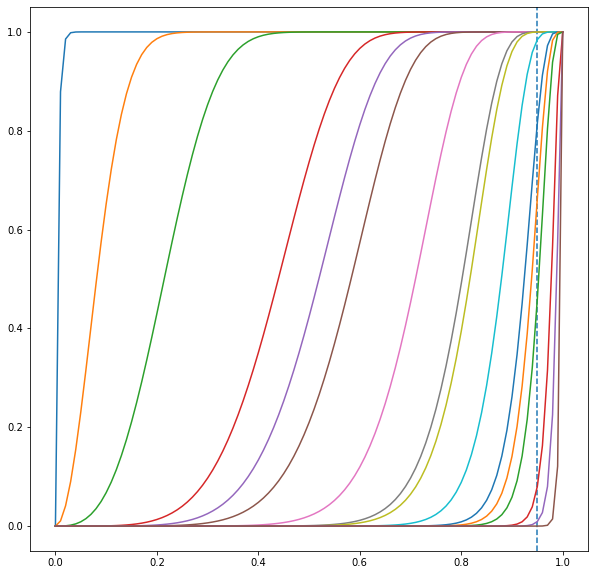

In [74]:
from IPython.core.pylabtools import figsize
#YOUR CODE STARTS HERE#
# here we define the list of all the candidate parameters
parameters=[(a, 210/a) for a in range(1, 211) if 210%a==0] # 180 is the number of rows of our signature matrix (permutations)
x=np.arange(0,1.01,0.01)
plt.figure(figsize=(10,10))
plt.axvline(x=0.95,linestyle="--")
areas={}
def f(x):
    return  1 - (1 - x**r)**b
#here we plot all the S-curves generated using the parameters
for r,b in parameters:
  a1 = integrate.quad(f, 0, 0.95)[0]
  a2 = (1-0.95)*1 - integrate.quad(f, 0.95, 1)[0]
  areas[(r,b)]  = (a1, a2, 1 - (1 - .95**r)**b)
  plt.plot(x, 1 - (1 - x**r)**b
           )
plt.show()










#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

####2.1.6
Among all the configurations you plotted in the previous step, choose the one that gives the smallest amount of False-Positives and False-Negatives near-duplicates candidates, satisfying the provided constraints. You **must** take into account, that after the LSH procedure, the approximate Jaccard similarity between near-duplicate candidates is computed and used to reduce their number.

Provide an explanation for your choice in **at most 3 sentences**.

----------YOUR TEXT STARTS HERE----------
the best configuration is the one having r equals to 21 and b to 10.
We chose these values as they minimize the false negatives sector while providing a good compromize on the false positive sector which remains small and they uphold the 0.97 probability requirement. The LSH procedure deals with the two errors in an asymmetric way as candidates are reduced in the procedure

In [75]:
#YOUR CODE STARTS HERE#
print (areas)

#YOUR CODE ENDS HERE#
#THIS IS LINE 5#

{(1, 210.0): (0.945260663507109, 0.0, 1.0), (2, 105.0): (0.86382046511106, 0.0, 1.0), (3, 70.0): (0.7340090511982322, 0.0, 1.0), (5, 42.0): (0.5164505199900796, 0.0, 1.0), (6, 35.0): (0.43846755246939506, 0.0, 1.0), (7, 30.0): (0.37611597673903496, 0.0, 0.9999999999999998), (10, 21.0): (0.2501707498042539, 1.3259948694610557e-11, 0.9999999953009203), (14, 15.0): (0.15794460561024062, 1.8577023978838536e-07, 0.9999560272631872), (15, 14.0): (0.14215328466040394, 7.566186937535413e-07, 0.9998354334046664), (21, 10.0): (0.07880044889775899, 0.00010881015779957981, 0.9844495787618874), (30, 7.0): (0.03406290397790852, 0.0020214101528564857, 0.8157165939520378), (35, 6.0): (0.02150863237547551, 0.004461732184978966, 0.6636931105877959), (42, 5.0): (0.011420259432244473, 0.008894553331694137, 0.4601103566500423), (70, 3.0): (0.0010919480523296221, 0.025375686177358914, 0.08048947870209144), (105, 2.0): (8.202122462167496e-05, 0.03595343318921089, 0.009141397975110377), (210, 1.0): (9.4492700

####2.1.7
Load the file containing the MinWiseHashing sketches and perform Locality Sensivity Hashing, using the parameters you chose in last step, considering also the computation of approximate Jaccard to reduce the number of candidates. Save the Near-Duplicates candidates obtained to a file named `hw1__NearDuplicates__set_a_id__set_b_id__approximate_jaccard.tsv`.

Print the execution time.

In [81]:
#YOUR CODE STARTS HERE#
start = time.time()
input_file_name= "/content/hw1__set_id__MinWiseHashing_sketch.tsv"
output_file_name = "hw1__NearDuplicates__set_a_id__set_b_id__approximate_jaccard.tsv"
r = 21
b = 10
mine_couples_of_Near_Duplicates(input_file_name, r, b, .95)
print(time.time()-start)




















#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

Starting the loading of the MinWiseHashing sketches from the input file.

Number of sets= 249999

Starting the mining of the CANDIDATES couples to be near duplicates.
c_band_progressive_id 0
c_band_progressive_id 1
c_band_progressive_id 2
c_band_progressive_id 3
c_band_progressive_id 4
c_band_progressive_id 5
c_band_progressive_id 6
c_band_progressive_id 7
c_band_progressive_id 8
c_band_progressive_id 9

Number of pairs of sets to be near-duplicate CANDIDATES= 41691


Number of REFINED pairs of sets to be near-duplicate CANDIDATES= 34091

93.31447100639343


####2.1.8
Load the file containing the number of near-duplicates candidates. Print the number of near-duplicates candidates you found.

In [80]:
#YOUR CODE STARTS HERE#
# we load the file
input_file_name = "hw1__NearDuplicates__set_a_id__set_b_id__approximate_jaccard.tsv"
input_file = open(input_file_name, 'r', encoding="utf-8")
input_file_csv_reader = csv.reader(input_file, delimiter='\t', quotechar='"', quoting=csv.QUOTE_NONE)
header = next(input_file_csv_reader)
#we print the number of near duplicates candidates
num=0
for record in input_file_csv_reader:
    num = num +1
print("the total number of near-duplicates candidates is ",num)
input_file.close()


 













#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

the total number of near-duplicates candidates is  34091


### Part 2.2
You will be given different scenarios and you will have to provide the best solution.

####2.2.1
Explain in **at most 3 sentences** how is possible to modify the provided Near-Duplicates Detection pipeline to have exactly 0 False-Positives in output. A brute-force approach is not considered as a valid solution.

----------YOUR TEXT STARTS HERE----------

By choosing a large number of bands the false positive sector becomes ever smaller until it has an area of 0. Another approach is to increase the size of the signature matrix M or increase the number of buckets.

####2.2.2
Consider the following scenario. You have to perform the entire Near-Duplicates pipeline by using exactly 1 hash function (n = r = b = 1). If we consider as Near-duplicates only couples of documents with Jaccard similarity exactly equal to 1, what is the amount of False-Positives and False-Negatives near-duplicates candidates generated in output by this configuration?

Provide your answer in **at most 3 sentences**.

----------YOUR TEXT STARTS HERE----------

Given this scenario, the amount of False-Negatives is 0 because we take only the documents with Jaccard similarity exactly equal to 1.
Instead for the amount of False-Positive we need to solve the following integral:  $\int_0^1 1-(1-x) \text{d}x=0.5$

Therefore, half the candidates are False-Positives

# Submission instructions

Follow the instructions precisely
1. Run the whole notebook up to this point
  * Click on this text cell and go to Runtime > Run before
  * It is essential that the notebook can be run from start to finish without us having to change anything.
2. Download the current notebook
  * File -> Download -> Download .ipynb
3. Upload the downloaded notebook in the current runtime
  * In the left sidebar menu, open the last tab (Files)
  * Click on the first button under the File title (Page with arrow pointing up)
  * In the new window, upload the notebook just downloaded



4. To turn the notebook into a pdf you need to install a Tex extension. Simply run the next cell of code:

In [43]:
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum ri
  ruby-dev bu

5. Now, run the next cell to transform the complete notebook to PDF.
  * The file will appear in the menu on the left (refresh if needed). The file should be named `DMT2022-HW1.pdf`
  * Rename this file **Surname1_Surname2_DMT2022HW1_code.pdf** (e.g. Fazzone_Siciliano_DMT2022HW1_code.pdf). Sort the surnames alphabetically.
  * Click on it and using the right button or the three dots at its side, click on download to transfer it to your local PC

In [82]:
!jupyter nbconvert --to pdf /content/DMT2022_HW1.ipynb

[NbConvertApp] Converting notebook /content/DMT2022_HW1.ipynb to pdf
[NbConvertApp] Support files will be in DMT2022_HW1_files/
[NbConvertApp] Making directory ./DMT2022_HW1_files
[NbConvertApp] Making directory ./DMT2022_HW1_files
[NbConvertApp] Making directory ./DMT2022_HW1_files
[NbConvertApp] Writing 816522 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 416160 bytes to /content/DMT2022_HW1.pdf


6. Now, run the next cell to transform the notebook to PDF without the code cells.
  * The file will appear in the menu on the left (refresh if needed). The file should be named `DMT2022-HW1.pdf`
  * Rename this file **Surname1_Surname2_DMT2022HW1_report.pdf** (e.g. Fazzone_Siciliano_DMT2022HW1_report.pdf). Sort the surnames alphabetically.
  * Click on it and using the right button or the three dots at its side, click on download to transfer it to your local PC
  

In [83]:
!jupyter nbconvert --to pdf --TemplateExporter.exclude_input=True /content/DMT2022_HW1.ipynb

[NbConvertApp] Converting notebook /content/DMT2022_HW1.ipynb to pdf
[NbConvertApp] Support files will be in DMT2022_HW1_files/
[NbConvertApp] Making directory ./DMT2022_HW1_files
[NbConvertApp] Making directory ./DMT2022_HW1_files
[NbConvertApp] Making directory ./DMT2022_HW1_files
[NbConvertApp] Writing 725511 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 345563 bytes to /content/DMT2022_HW1.pdf


7. Now, download this notebook again and change its name.
  * Go to File -> Download -> Download .ipynb
  * Rename the downloaded notebook **Surname1_Surname2_DMT2022HW1_notebook.ipynb** (e.g. Fazzone_Siciliano_DMT2022HW1_notebook.ipynb). Sort the surnames alphabetically.
  * **!!! Even if you have downloaded it previously, please repeat the operation at this step !!!**

8. Now that you have all three files, you need to upload them to Classroom. Only the student with the highest surname in alphabetical order **must** upload the files. Only the files uploaded by this student will be graded.